Dataset Preview:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


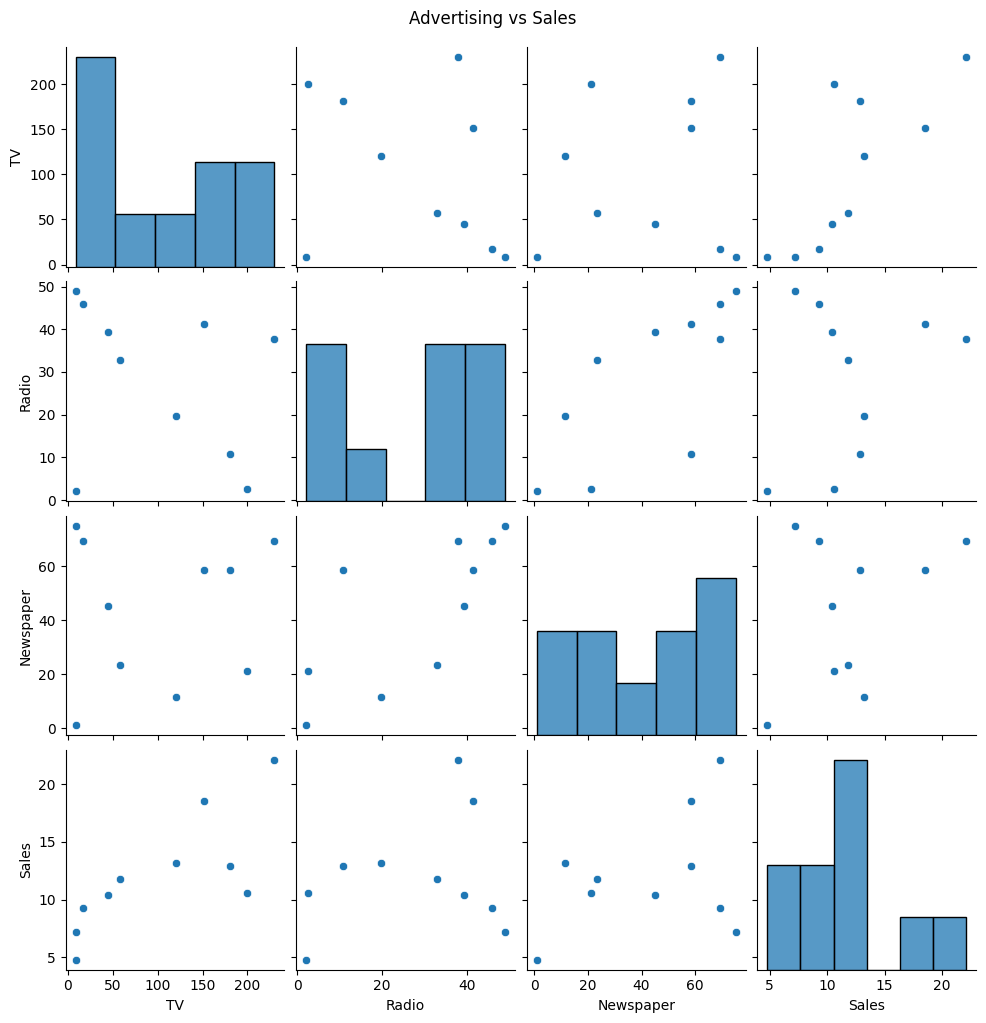

Train size: 8, Test size: 2

Model Performance:
Mean Squared Error: 13.201451790963423
R2 Score: -0.6838586468065588

Model Coefficients:
     Feature  Coefficient
0         TV     0.074687
1      Radio     0.302915
2  Newspaper    -0.069256


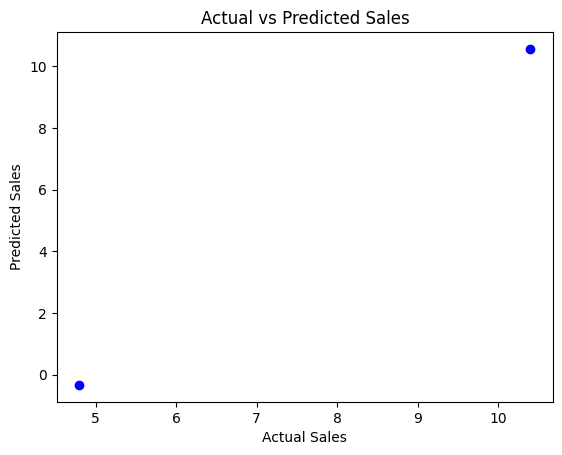

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {
    "TV": [230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8],
    "Radio": [37.8, 39.3, 45.9, 41.3, 10.8, 48.9, 32.8, 19.6, 2.1, 2.6],
    "Newspaper": [69.2, 45.1, 69.3, 58.5, 58.4, 75.0, 23.5, 11.6, 1.0, 21.2],
    "Sales": [22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6]
}

df = pd.DataFrame(data)

print("Dataset Preview:")
print(df.head())

sns.pairplot(df)
plt.suptitle("Advertising vs Sales", y=1.02)
plt.show()

X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nModel Coefficients:")
print(coefficients)

plt.scatter(y_test, y_pred, color="blue")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()
